#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem
# Evan Matel, evanjm


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

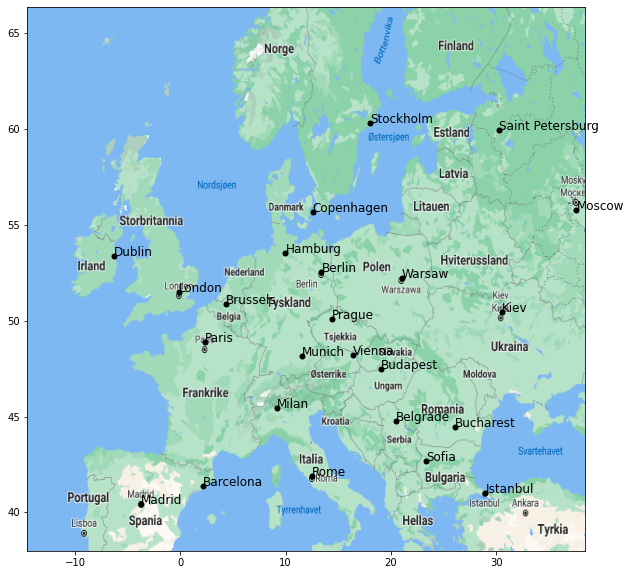

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


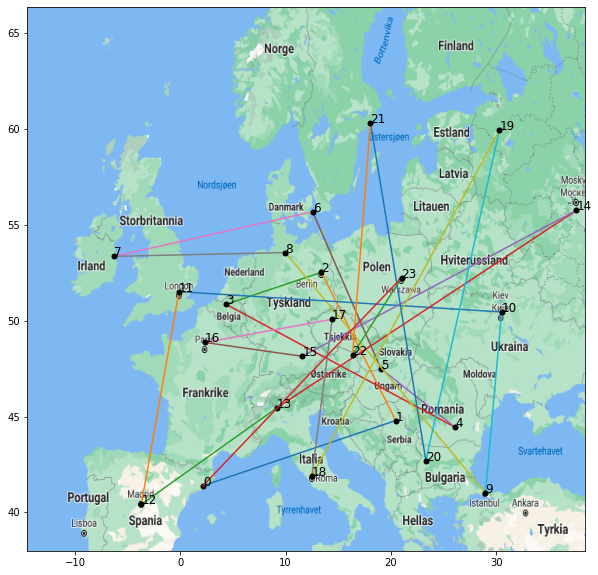

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

<ipython-input-5-6c0243a6c9e2>:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  TenShortestTrips = np.array([TenDistances, TenRoutes])


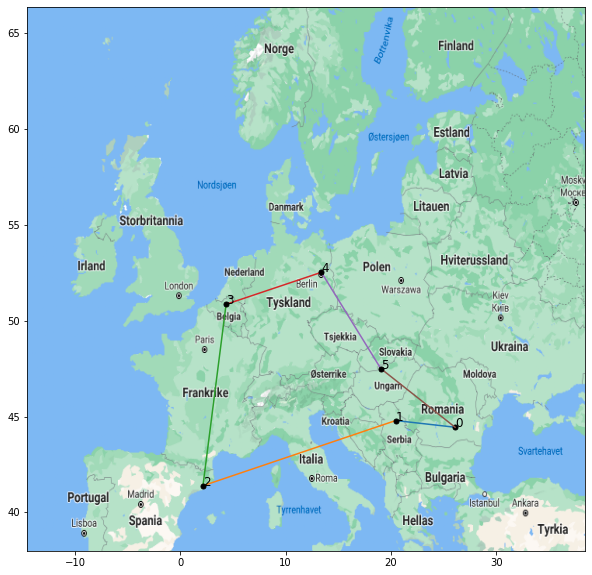

The program takes 0.2561609745025635s to run with 6 cities.
The program takes 55.23439598083496s to run with 10 cities.


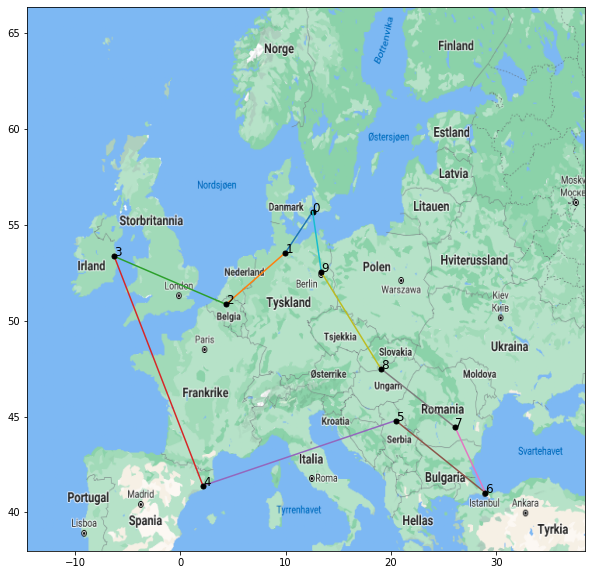

In [5]:
import numpy as np
import time
import itertools


# opening and reading the data
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
data = np.array(data)
CityNames = data[0] # saving the city names for plotting later
data = np.delete(data, 0, axis=0)
data = data.astype(float)





#starting the actual calculation

def ExSearchTripCalc(data, N):
    cities = np.arange(N)
    allpossibilities = np.asarray(list(itertools.permutations(cities)))
    TotLen = np.zeros((len(allpossibilities), 2))

    for i in range(len(allpossibilities)):
        trip = 0
        for j in range(len(allpossibilities[0]) - 1):
            x = allpossibilities[i][j]
            y = allpossibilities[i][j+1]
            trip += data[x][y]
        trip += data[allpossibilities[i][-1]][allpossibilities[i][0]]
        TotLen[i] = np.asarray([trip, round(i)])

    #redefining
    TotLen = np.transpose(TotLen) # transposing in order to manipulate easier
    mean = np.mean(TotLen[0][:])

    # shrinking TotLen to save time
    TotLen2 = []
    for i in range(len(TotLen[0])):
        if TotLen[0][i] < mean:
           TotLen2.append((TotLen[0][i], TotLen[1][i]))
    TotLen = np.asarray(TotLen2)

    # sorting the rows based on the length of the trip
    a = TotLen[:, 0].argsort()
    TotLen = TotLen[a]
    TotLen = np.transpose(TotLen)
    x, y = np.unique(TotLen[0], return_index=True)
    x, y = x[::2], y[::2]
    y = TotLen[1][y]
    y = np.array(list(map(int, y)))
    TenDistances = np.array([x[:10]])
    TenRoutes = allpossibilities[y[:10]]
    TenShortestTrips = np.array([TenDistances, TenRoutes])


    return np.asarray(TenShortestTrips)

def RunExhaust(Ncities):
    t1 = time.time() # starting the clock for six cities

    Cities = ExSearchTripCalc(data, Ncities)
    shortesttrip = Cities[1][0] # choosing the shortest
    TravelledCities = CityNames[shortesttrip]
    plot_plan(TravelledCities)

    t2 = time.time() # stopping the clock
    time1 = t2 - t1
    print(f'The program takes {time1}s to run with {Ncities} cities.')

    return shortesttrip, time1

six, time6 = RunExhaust(6)
ten, time10 = RunExhaust(10)


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [6]:
def CalcDist(data, Route): # my fitness function that I first use in Hill Climbing,
                           # but I am placing it here so that I can do the following calculation.
    Distance = 0
    for i in range(len(Route) - 1):
        x = Route[i]
        y = Route[i+1]
        Distance += data[x][y]
    Distance += data[Route[-1]][Route[0]]

    return Distance


print(f"The shortest trip for 10 cities is {ten}, and it has a distance of {CalcDist(data, ten)} km.")

# calculating the time it would take to calculate 24 cities
from math import factorial

# k = T / N! is the formula for O(N!) time complexity

k = time10 / factorial(10) # calculating a constant based on the values from 10 cities
Time24 = k * factorial(24) # using that constant on 24

print(f'It would take roughly {Time24 / 60 / 60 / 24 / 365} years to calculate the TSP using exhaustive search.')

The shortest trip for 10 cities is [6 8 3 7 0 1 9 4 5 2], and it has a distance of 7486.309999999999 km.
It would take roughly 299464702106.37463 years to calculate the TSP using exhaustive search.


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

For 10 cities, Best: 7486.310 km, Worst: 7729.010 km, Mean: 7575.254 km, StandDev: 94.788 km
The program takes 26.776492834091187s to run.
For 24 cities, Best: 19165.690 km, Worst: 22208.320 km, Mean: 21267.090 km, StandDev: 735.682 km
The program takes 44.86055874824524s to run.


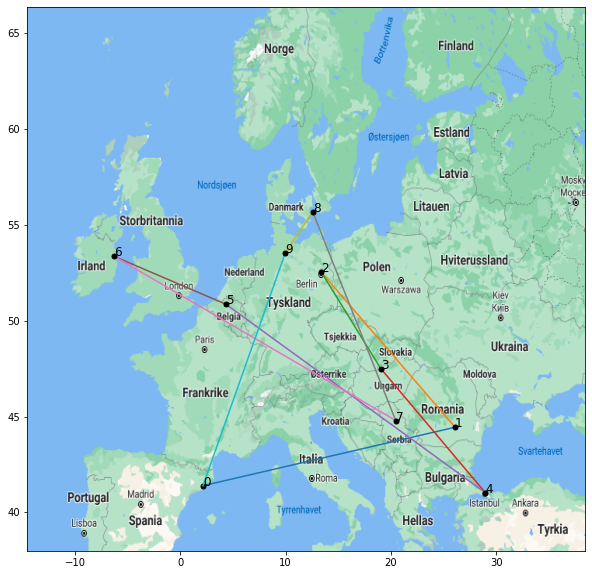

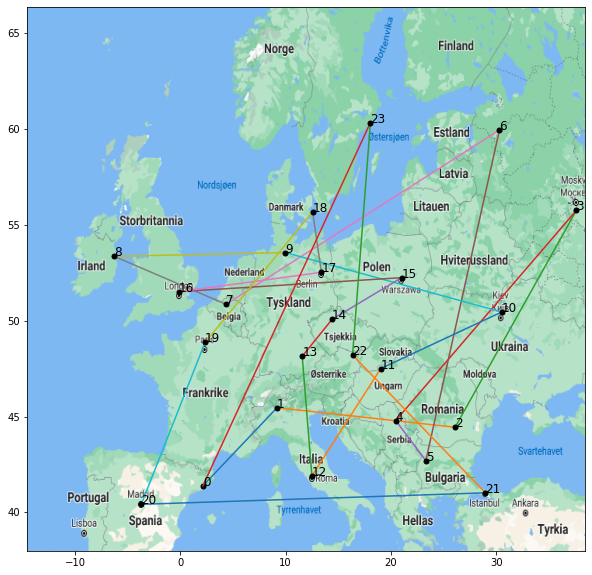

In [7]:

def SwapMutation(gene): # swapping two random values in the gene
    if type(gene) == np.array:
        for i in range(len(gene)):
            index1 = np.random.randint(len(gene[0]))
            index2 = np.random.randint(len(gene[0]))
            if index1 == index2 and index2 != len(gene[0]) - 1:
                index2 = index2 + 1
            elif index2 == len(gene[0]) - 1:
                index2 = 0
            NewGene = gene[i]
            NewGene[index1], NewGene[index2] = NewGene[index2], NewGene[index1]
            gene[i] = NewGene

        NewGene = gene

    else:
        index1 = np.random.randint(len(gene))
        index2 = np.random.randint(len(gene))
        if index1 == index2 and index2 != len(gene) - 1:
            index2 = index2 + 1
        elif index2 == len(gene) - 1:
            index2 = 0
        NewGene = gene
        NewGene[index1], NewGene[index2] = NewGene[index2], NewGene[index1]


    return NewGene


def HillClimber(data, Ncities, pr=None, Niter=100_000):
    if Niter < 100:
        raise ValueError("Niter must be greater than 100.")

    Route0 = np.random.permutation(np.arange(Ncities))
    Distance0 = CalcDist(data, Route0)
    for i in range(Niter):
        Route1 = SwapMutation(Route0)
        Distance1 = CalcDist(data, Route1)

        if Distance1 < Distance0:
            Distance0 = Distance1
            Route0 = Route1

    if pr == None:
        print(f'Shortest route is {Route0} which has a distance of {Distance0} km.')
    return Route0, Distance0


def runs(data, Ncities):
    routes = []
    distance = []
    for i in range(20):
        Route, Distance = HillClimber(data, Ncities, pr=0)
        routes.append(Route)
        distance.append(Distance)

    routes_a = np.asarray(routes)
    distance_a = np.asarray(distance)


    Best = np.min(distance_a)
    for i in range(len(routes_a)):
        if distance_a[i] == Best:
            BestRoute = routes_a[i]

    Worst = np.max(distance_a)
    Mean = np.mean(distance_a)
    Std = np.std(distance_a)
    print(f'For {Ncities} cities, Best: {Best:.3f} km, Worst: {Worst:.3f} km, '
          f'Mean: {Mean:.3f} km, StandDev: {Std:.3f} km')
    return BestRoute

t1 = time.time()

BestRoute10 = runs(data, 10)
Cities10 = CityNames[BestRoute10]
plot_plan(Cities10)

t2 = time.time() # stopping the clock
Time = t2 - t1
print(f'The program takes {Time}s to run.')

t1 = time.time()

BestRoute24 = runs(data, 24)
Cities24 = CityNames[BestRoute24]
plot_plan(Cities24)

t2 = time.time() # stopping the clock
Time = t2 - t1
print(f'The program takes {Time}s to run.')

I don't understand exactly what went wrong when it comes to plotting the route here. I get the correct value everytime,
(im comparing to my exhaustive search), but the route is obviously incorrect. When comparing the length of time it takes
to run 10 cities with exhaustive search, it takes half the time, and it only takes 40ish seconds for 24 cities, and that
would've taken almost literally forever using exhaustive search.



## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

For a population of 50, Best: 7486.310 km, Worst: 7503.100 km, Mean: 7487.989 km, StandDev: 5.037 km
The program takes 46.59s to run 20 times, for 10 cities, and with a population size of 50. 

For a population of 50, Best: 15397.150 km, Worst: 19238.690 km, Mean: 17343.296 km, StandDev: 986.066 km
The program takes 113.88s to run 20 times, for 24 cities, and with a population size of 50. 

For a population of 100, Best: 14221.190 km, Worst: 17855.870 km, Mean: 16143.081 km, StandDev: 937.859 km
The program takes 191.43s to run 20 times, for 24 cities, and with a population size of 100. 

For a population of 150, Best: 14162.260 km, Worst: 18051.560 km, Mean: 15624.851 km, StandDev: 1013.646 km
The program takes 292.68s to run 20 times, for 24 cities, and with a population size of 150. 



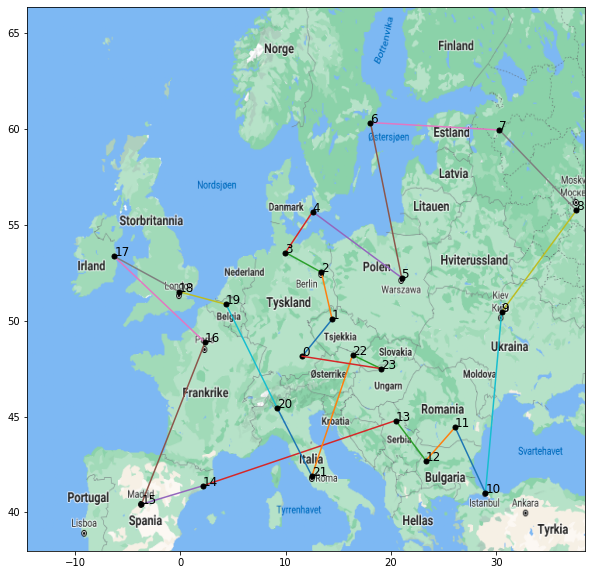

In [8]:

def PopInit(pop_size, Ncities): # initializing a population of N size, with random permuations of M cities
    population = []
    for i in range(pop_size):
        population.append(np.random.permutation(np.arange(Ncities)))

    return np.asarray(population)


def ParentSelection(population):  #selecting the best parents from the population using tournament selection

    IndexRange = np.arange(len(population)) # making a range of indices for the population
    Indices = np.random.choice(IndexRange, (int(len(IndexRange)/2), 2)) # making the tournament shape
    Round = population[Indices]                                         # of random competitors

    #calculating the fitness
    PopFitness = Round.copy()
    for i in range(int(len(IndexRange)/2)):
        for j in range(2):
            PopFitness[i,j] = CalcDist(data, Round[i,j])
    PopFitness = PopFitness[:, :, 0]
    #sorting the individuals based on their fitness and removing the "losers"
    idx = np.argsort(PopFitness)
    RoundSort = []
    for i in range(len(Round)): # going through each "match"
        for j in idx[i]: # going through the sorted indices
            if j == 0:  # picking the lowest number
                RoundSort.append(Round[i, j])

    population = np.asarray(RoundSort)

    parents = population

    return parents


def order_crossover(a, b, start, stop):     # this function was taken from Weekly Exercises 3 Solutions
                                            # on UiO's IN3050 Spring 2023 semester site
    child = [None]*len(a)

    # Copy a slice from first parent:
    child[start:stop] = a[start:stop]

    # Fill using order from second parent:
    b_ind = stop
    c_ind = stop
    l = len(a)
    while None in child:
        if b[b_ind % l] not in child:
            child[c_ind % l] = b[b_ind % l]
            c_ind += 1
        b_ind += 1

    return child

def Crossover(parents):                 # this function was also taken from Weekly Exercises 3 Solutions
                                        # on UiO's IN3050 Spring 2023 semester site and edited
    half = len(parents[0]) // 2
    start = np.random.randint(0, len(parents[0])-half)
    stop = start + half
    children = []
    for i in range(0, len(parents)-1, 2):
        a, b = parents[i], parents[i+1]
        child1, child2 = order_crossover(a, b, start, stop), order_crossover(b, a, start, stop)
        children.append(child1)
        children.append(child2)

    return np.asarray(children)


def SurvivorSelection(population, children):  # using (mu + lambda) survivor selection
    PopList = list(population)
    ChildList = list(children)
    Total = np.asarray(PopList + ChildList)

    fitness = []
    for i in Total:
        fitness.append(CalcDist(data, i))   # calculating fitness for population

    idx = np.argsort(fitness)     # indexes for sorting the population based on fitness
    TotRoutes_FitnessSort = Total[idx]   # the population sorted by fitness from least to greatest

    fitness = np.asarray(fitness)
    FitSort = fitness[idx]      # sorted fitness


    N1 = int(len(children) / 2)  # choosing 1/4 of the best individuals from the total current population
    N2 = int(N1*3)  # creating (N = 3/4 of the original population) new individuals
    Ncities = len(TotRoutes_FitnessSort[0])
    NewCompetitors = []
    for i in range(N2):
        NewCompetitors.append(np.random.permutation(np.arange(Ncities)))

    NewPop = np.asarray(list(TotRoutes_FitnessSort[:N1]) + NewCompetitors)

    return NewPop, FitSort[0]



def SortPopulation(population):
    PopFit = []
    for i in population:
        PopFit.append(CalcDist(data, i))
    PopFit = np.asarray(PopFit)
    idx = np.argsort(PopFit)
    FitSort = PopFit[idx]
    PopSort = population[idx]

    return PopSort, FitSort



def GeneticAlgorithm(pop_size, Ncities, Niter):

    population = PopInit(pop_size, Ncities)

    Nstop = Niter // 10
    Best = list(np.zeros(Nstop))  # creating a list of 50 zeros for indexing reasons
    for i in range(Niter):
        parents = ParentSelection(population)
        children = Crossover(parents)
        MutatedChildren = SwapMutation(children)
        NewPop, BestFit = SurvivorSelection(population, MutatedChildren)
        population = NewPop

        Best.append(BestFit)
        if i >= Nstop and BestFit == Best[i-Nstop]:  # if the best solution hasn't changed in a
            break                     # certain amount of iterations, stop.





    # finding the fitness and sorting the population based off the fitness
    PopSort, FitSort = SortPopulation(population)

    return  list(PopSort[0]), FitSort[0], np.mean(FitSort) # returns the best route and the fitness of the route




def Islands(Nislands, Ncities, Niter, pop_size):  # making this function to explore better

    islands_pop = []
    average = []
    for i in range(Nislands):
        Route, Distance, mean = GeneticAlgorithm(pop_size, Ncities, Niter)
        islands_pop.append(Route)
        average.append(mean)


    pop = np.asarray(islands_pop)
    PopSort, FitSort = SortPopulation(pop)
    BestRoute, BestDistance = PopSort[0], FitSort[0]

    Best = FitSort[0]
    Worst = FitSort[-1]
    Mean = np.mean(FitSort)
    Std = np.std(FitSort)
    print(f'For a population of {pop_size}, Best: {Best:.3f} km, Worst: {Worst:.3f} km, '
          f'Mean: {Mean:.3f} km, StandDev: {Std:.3f} km')


    return BestRoute, BestDistance, average



t1 = time.time()

Nislands=20
Niter=5000
Ncities=10

popsize = 50
Route, Distance, average = Islands(Nislands, Ncities, Niter, pop_size=popsize)

t2 = time.time() # stopping the clock
Time_pop_size_100 = t2 - t1
print(f'The program takes {Time_pop_size_100:.2f}s to run 20 times, for {Ncities} cities, and with a population size of {popsize}. \n')


Ncities=24


t1 = time.time()
popsize = 50
Route, Distance, average1 = Islands(Nislands, Ncities, Niter, pop_size=popsize)

t2 = time.time() # stopping the clock
Time_pop_size_100 = t2 - t1
print(f'The program takes {Time_pop_size_100:.2f}s to run 20 times, for {Ncities} cities, and with a population size of {popsize}. \n')



t1 = time.time()

popsize = 100
Route, Distance, average2 = Islands(Nislands, Ncities, Niter, pop_size=popsize)

t2 = time.time() # stopping the clock
Time_pop_size_500 = t2 - t1
print(f'The program takes {Time_pop_size_500:.2f}s to run 20 times, for {Ncities} cities, and with a population size of {popsize}. \n')



t1 = time.time()

popsize = 150
Route, Distance, average3 = Islands(Nislands, Ncities, Niter, pop_size=popsize)
Cities = CityNames[Route]
plot_plan(Cities)

t2 = time.time() # stopping the clock
Time_pop_size_1000 = t2 - t1
print(f'The program takes {Time_pop_size_1000:.2f}s to run 20 times, for {Ncities} cities, and with a population size of {popsize}. \n')

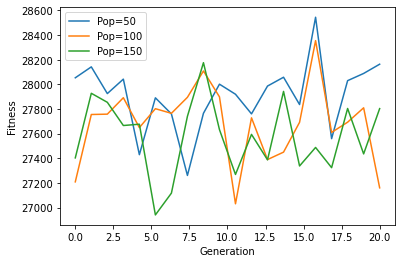

In [9]:
x = np.linspace(0, len(average1), len(average1))
plt.plot(x, average1, label='Pop=50')
plt.plot(x, average2, label='Pop=100')
plt.plot(x, average3, label='Pop=150')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close?

 - Yes, it found the shortest tour.

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search?

-   For 10 cities, my GA program runs 20 times in less time than it took for exhaustive search to run once. For 24 cities,
it would take forever to calculate 24 cities, and here it only takes around 2-3 minutes.

How many tours were inspected by your GA as compared to by the exhaustive search?

-    My GA inspects 20*(Pop_size * Niter) routes while exhaustive search inspects (Ncities!) routes, so which inspects
fewer routes completely depends on what perameters you put into the GA and how many cities you are looking at.